In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parte 1

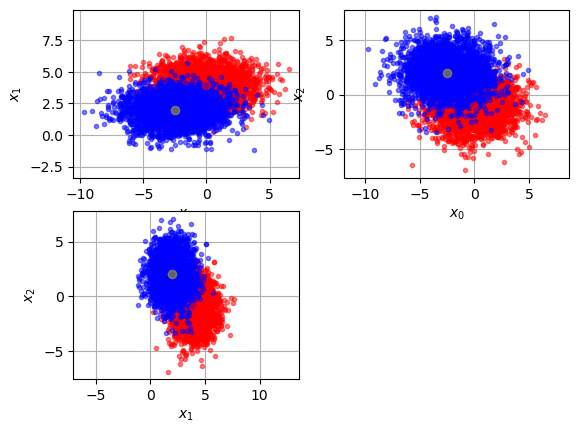

In [2]:
N=3000

# Definisco i vettori delle medie della classe S e B e la matrice di covarianza, essendo che voglio andare a generare due distrubuzioni normali multivariate f(x0,x1,x2|S) e f(x0,x1,x2|B)
mu_s=np.array([0.0,4.0,-1.0])
mu_b=np.array([-2.5,2.0,2.0])
cov=np.diag((4.0,1.0,2.25))

# Creo le due distribuzione normali multivariate, ognuna delle due distribuzione conterrà 3 distribuzioni normali (singole) ognuna definita dalla sua varianza e valor medio, avremo quindi una matrice con 3 colonne e 3000 righe, per ognuna delle due distribuzioni
S=np.random.multivariate_normal(mu_s, cov, size=N)
B=np.random.multivariate_normal(mu_b, cov, size=N)

# plotto le distribuzioni ottenute come: x0 vs x1, x0 vs x2, x1 vs x2 (ogni x corrisponde ad 1 vettore di 3000 valori)
plt.subplot(2,2,1)
plt.plot(S[: , 0], S[:, 1], '.r', alpha=0.5)
plt.plot(B[: , 0], B[:, 1], '.b', alpha=0.5)
plt.plot(mu_s[0],mu_s[1],'ro', alpha=0.5)
plt.plot(mu_b[0],mu_b[1],'yo', alpha=0.5)
plt.xlabel('$x_0$')
plt.ylabel('$x_1$')
plt.axis('equal')
plt.grid(True)

plt.subplot(2,2,2)
plt.plot(S[: , 0], S[:, 2], '.r', alpha=0.5)
plt.plot(B[: , 0], B[:, 2], '.b', alpha=0.5)
plt.plot(mu_s[0],mu_s[2],'ro', alpha=0.5)
plt.plot(mu_b[0],mu_b[2],'yo', alpha=0.5)
plt.xlabel('$x_0$')
plt.ylabel('$x_2$')
plt.axis('equal')
plt.grid(True)

plt.subplot(2,2,3)
plt.plot(S[: , 1], S[:, 2], '.r', alpha=0.5)
plt.plot(B[: , 1], B[:, 2], '.b', alpha=0.5)
plt.plot(mu_s[1],mu_s[2],'ro', alpha=0.5)
plt.plot(mu_b[1],mu_b[2],'yo', alpha=0.5)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.axis('equal')
plt.grid(True)

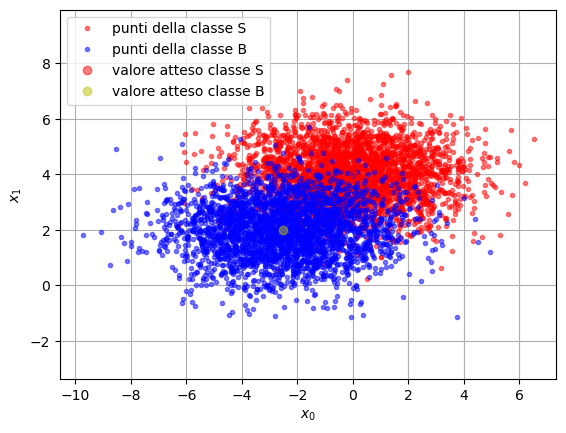

In [3]:
plt.plot(S[: , 0], S[:, 1], '.r', alpha=0.5, label='punti della classe S')
plt.plot(B[: , 0], B[:, 1], '.b', alpha=0.5, label='punti della classe B')
plt.plot(mu_s[0],mu_s[1],'ro', alpha=0.5, label='valore atteso classe S')
plt.plot(mu_b[0],mu_b[1],'yo', alpha=0.5, label='valore atteso classe B')
plt.xlabel('$x_0$')
plt.ylabel('$x_1$')
plt.axis('equal')
plt.grid(True)
plt.legend()

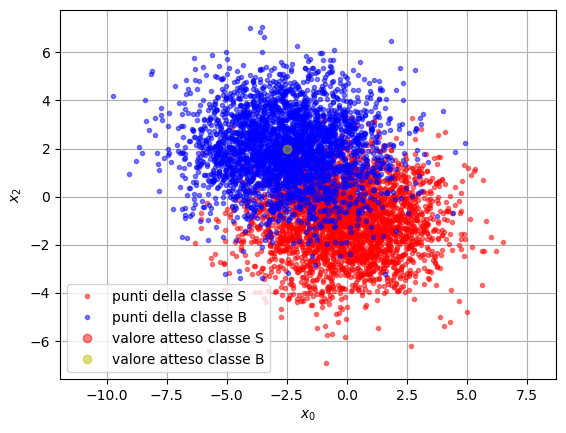

In [4]:
plt.plot(S[: , 0], S[:, 2], '.r', alpha=0.5, label='punti della classe S')
plt.plot(B[: , 0], B[:, 2], '.b', alpha=0.5, label='punti della classe B')
plt.plot(mu_s[0],mu_s[2],'ro', alpha=0.5, label='valore atteso classe S')
plt.plot(mu_b[0],mu_b[2],'yo', alpha=0.5, label='valore atteso classe B')
plt.xlabel('$x_0$')
plt.ylabel('$x_2$')
plt.axis('equal')
plt.grid(True)
plt.legend()

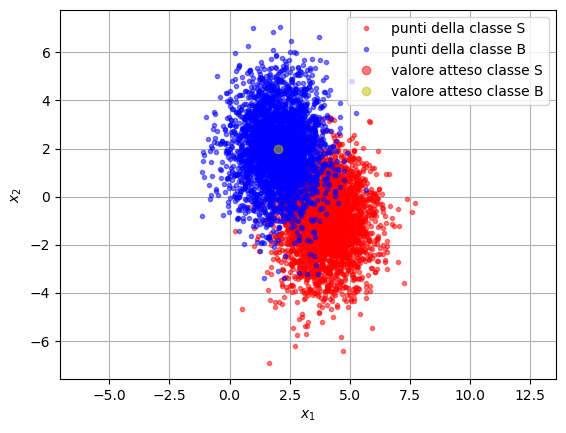

In [5]:
plt.plot(S[: , 1], S[:, 2], '.r', alpha=0.5, label='punti della classe S')
plt.plot(B[: , 1], B[:, 2], '.b', alpha=0.5, label='punti della classe B')
plt.plot(mu_s[1],mu_s[2],'ro', alpha=0.5, label='valore atteso classe S')
plt.plot(mu_b[1],mu_b[2],'yo', alpha=0.5, label='valore atteso classe B')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.axis('equal')
plt.grid(True)
plt.legend()

# Parte 2

classe S, gaussiana numero: 1
pdf(x0=4.0|S) =  0.03875000000000005


classe B, gaussiana numero: 1
pdf(x0=4.0|B) =  0.0006249999999999995



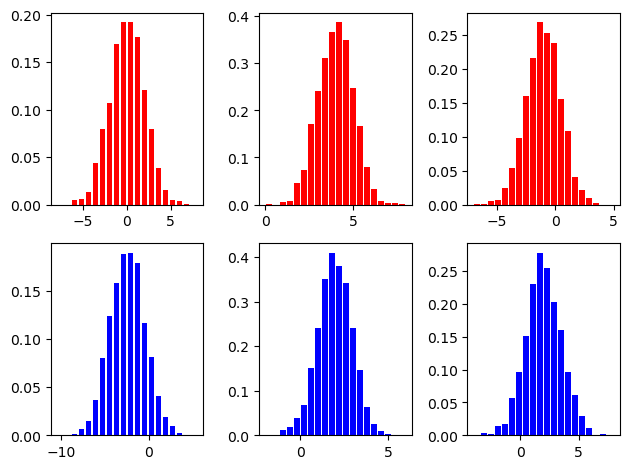

In [9]:

# Definisco ora la funzione pdf che calcola la probabilita di un generico valore x all'interno di un determinato bin
def pdf(x,P,E):
    if x>E[-1]:             # controlla se x si trova al di fuori dei bin
        return 0.0          # se così fosse allora la probabilità = 0
    res=np.where(E<x)[0]    # crea un array che prende solo i valori del vettore edge(che contiene gli estremi di ogni bin) che siano minori del generico valore x
    if np.size(res)>0:      # verifico dunque che l'array contenga almeno un valore, cioè quindi che x sia caduto all'interno di un bin
        return P[res[-1]]   # ritorna la probabilita dell'ultimo bin (cioè il bin in cui è presente il valore x)
    return 0.0

# Definisco tutto ciò che mi serve
M=20
pdfS=[]
pdfB=[]
edgeS=[]
edgeB=[]
x=4.0
ind=0

# for che itera sulle tre gaussiane di ogni classe, creando dunque un istogramma per ogni gaussiana creata precedentemente, ricavando gli array: n (contiene la probabilità che c'è in ogni bin), edges (contiene i valori degli estremi tra un bin e l'altro). fatto ciò viene iterato 3 volte (per ogni gaussiana) creando delle matrici: pdf (contiene la probabilità in ogni bin per tutte e tre le gaussiane di una data classe) matrice 20x3, edges (contiene gli intervalli tra un bin e l'altro di ogni gaussiana di una data classe) matrice 21x3
for i in range(3):
    plt.subplot(2,3,i+1)
    n,edges,_=plt.hist(S[:2000,i], bins=M, rwidth=0.8, color='red', range=(mu_s[i]-4*np.sqrt(cov[i,i]),mu_s[i]+4*np.sqrt(cov[i,i])), density=True)
    pdfS.append(n)
    edgeS.append(edges)
    plt.subplot(2,3,i+4)
    n,edges,_=plt.hist(B[:2000,i], bins=M, rwidth=0.8, color='blue', range=(mu_b[i]-4*np.sqrt(cov[i,i]),mu_b[i]+4*np.sqrt(cov[i,i])), density=True)
    pdfB.append(n)
    edgeB.append(edges)

plt.tight_layout()            # comando che distanzia un grafico dall'altro per non farli sovrapporre

# Trovo e printo i valori della probabilità di uno specifico valore in entrambe le classi in una determinata gaussiana tra le tre disponibili (di ogni classe)
print("classe S, gaussiana numero:", ind+1)
print('pdf(x0=4.0|S) = ', pdf(x, pdfS[ind], edgeS[ind]))
print("\n")
print("classe B, gaussiana numero:", ind+1)
print('pdf(x0=4.0|B) = ', pdf(x, pdfB[ind], edgeB[ind]))
print()

# Parte 3

Nella seguente parte, verrà implementato il modello predittivo facendo uso delle distribuzioni e funzioni implementate nei due codici precedenti. Nello specifico verrà implementato un classificatore basato sul maximum likelihood ratio. Da questo modello è possibile distinguere e quindi categorizzare dei dati valori nelle due classi calcolando il seguente valore d:

> ${d(x_0,x_1,x_2) = \frac{\prod_{i} p(x_i|S)}{\prod_{i}\, p(x_i|S)~+~\prod_{i}\, p(x_i|B)}}$

ottenuto il valore d posso distinguere se farà parte della classe S o B utilizzando il discriminante, seguendo tali condizioni:

> $if(d \ge 0.5): \to S \hspace{10mm}  else: \to B$

d(mu_S): 0.995338960363475
d(mu_B): 0.006640987923816963


C:\Users\simon\AppData\Local\Temp\ipykernel_7692\3416717239.py:13: RuntimeWarning: invalid value encountered in scalar divide
  return num/den


matrice di confusione training: 
 [[1890  110]
 [ 127 1873]]
allenamento del modello:
accuratezza: 0.94075
precisione: 0.9370352007932573


matrice di confusione test: 
 [[930  70]
 [ 65 935]]
test del modello:
accuratezza: 0.9325
precisione: 0.9346733668341709


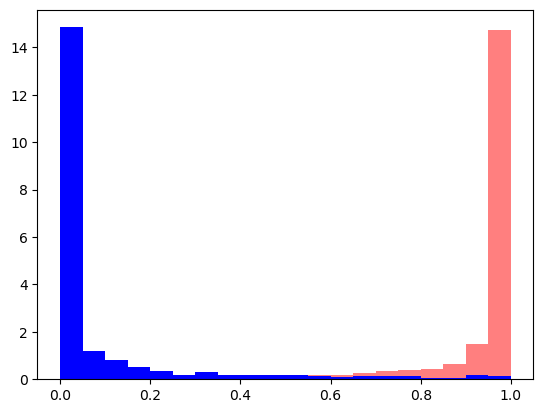

In [7]:
#definiso la funzione per poter calcolare d, come parametri in ingresso viene preso il vettore a 3 componenti x, la matrice che tiene conto della probabilità in ogni bin di tutte e tre le gaussiane di una data classe, e la matrice edges che tiene conto degli intervalli di ogni bin di tutte e tre le gaussiane di una dta classe
def d(x,PS,PB,ES,EB):
    ProbS=np.zeros([3])   # Inizializzo dei numpy array a 0
    ProbB=np.zeros([3])
    #inizializzo un ciclo for per 3 iterazioni (cioe il nuemro delle futures del vettore x) al cui interno calcolo la probabilità nella classe S e B per una gaussiana alla volta (quindi pdf da matrice a vettore sia per la probabilità che per edges) e grazie alla funzione pdf calcola la probabilità di tutte e 3 le x che cadono in un determinato bin (quindi con una determinata probabilità) e per concludere ritorna il valore di d calcolato sui 3 valori di x
    for i in range(3):
        Ps=pdf(x[i], PS[i], ES[i])
        Pb=pdf(x[i], PB[i], EB[i])
        ProbS[i]=Ps
        ProbB[i]=Pb
    num=np.prod(ProbS)
    den=np.prod(ProbS) + np.prod(ProbB)
    return num/den

# Funzione discriminante che ritorna un valore 1 (S) o -1 (B) in base al valore della d
def discriminante(x,PS,PB,ES,EB):
    if d(x,PS,PB,ES,EB) >= 0.5:
        return 1
    else:
        return -1

# Printo i valori delle d nei valori attesi mu_S e mu_B
print("d(mu_S):", d(mu_s,pdfS,pdfB,edgeS,edgeB))
print("d(mu_B):", d(mu_b,pdfS,pdfB,edgeS,edgeB))

# mi trovo una nuova lista di valori della d iterando 3 x alla volta nelle matrici 3000 x 3 delle distribuzioni S e B
dS=[d(x,pdfS,pdfB,edgeS,edgeB) for x in S]
dB=[d(x,pdfS,pdfB,edgeS,edgeB) for x in B]

# Plotto gli istogrammi di dS e dB
plt.hist(dS, bins=M, range=(0,1), alpha=0.5, color='red', density=True)
plt.hist(dB, bins=M, range=(0,1), color='blue', density=True)

# FASE DI ALLENAMENTO DEL MODELLO:
#-----------------------------------------------------------------------------------------------------------------------------------------
# Vengono utilizzate le prime 2000 righe delle 3 colonne di S e B per allenaere il modello. Otterrò dunque due array contenenti valori 1 e -1
S_train=[discriminante(x,pdfS,pdfB,edgeS,edgeB) for x in S[:2000]]
B_train=[discriminante(x,pdfS,pdfB,edgeS,edgeB) for x in B[:2000]]

# Mi calcolo gli elementi della matrice di confusione andando a sommare i valori che soddisfano le seguenti proprietà:
TP=np.sum((np.array(S_train)>=0)==True)  # Restituisce la quantità di valori positivi che contiene
FN=np.sum((np.array(S_train)<0)==True)   # Restituisce la quantità di valori negativi che contiene
FP=np.sum((np.array(B_train)>=0)==True)  # Restituisce la quantità di valori positivi che contiene
TN=np.sum((np.array(B_train)<0)==True)   # Restituisce la quantità di valori negativi che contiene

# Creo la matrice di confusione
matrix_conf_train=np.array([[TP,FN],[FP,TN]])
print("matrice di confusione training: \n", matrix_conf_train)
# Calcolo i parametri del modello di allenamento
acc_train=(TP+TN)/(TP+TN+FN+FP)
pr_train=TP/(TP+FP)
print("allenamento del modello:")
print("accuratezza:", acc_train)
print("precisione:", pr_train)
print("\n")
#-----------------------------------------------------------------------------------------------------------------------------------------


# FASE DI TEST DEL MODELLO:
#-----------------------------------------------------------------------------------------------------------------------------------------
# Vengono fatti medesimi passaggi di prima ma solo sulle ultime 1000 righe delle 3 colonne delle matrici S e B (gli unici valori non utilizzati per allenare il modello)
S_test=[discriminante(x,pdfS,pdfB,edgeS,edgeB) for x in S[2000:]]
B_test=[discriminante(x,pdfS,pdfB,edgeS,edgeB) for x in B[2000:]]

TP=np.sum((np.array(S_test)>=0)==True)
FN=np.sum((np.array(S_test)<0)==True)
FP=np.sum((np.array(B_test)>=0)==True)
TN=np.sum((np.array(B_test)<0)==True)

matrix_conf_test=np.array([[TP,FN],[FP,TN]])
print("matrice di confusione test: \n", matrix_conf_test)
acc_train=(TP+TN)/(TP+TN+FN+FP)
pr_train=TP/(TP+FP)
print("test del modello:")
print("accuratezza:", acc_train)
print("precisione:", pr_train)
#-----------------------------------------------------------------------------------------------------------------------------------------

